# Multi-Armed Bandits Part-4

**Youtube Video:-**


## Key TakeAways

1. What is Upper Confidence Bound Method
3. How to implement Upper Confidence Bound (UCB) Algorithm
4. Comparison with Epsilon-Greedy Method

## Upper Confidence Bound

- There is always uncertainty about the accuracy in the action-value estimates
- Hence exploration is needed
- Epsilon-greedy action selection forces non-greedy action to be tried but it does so indiscriminately, with no preference for those that are nearly greedy or particularly uncertain

- It would be better to select non-greedy action according to their potential for actually being optimal
- This means taking into account
  - how close their estimates are to maximum value
  - and uncertainties in those estimates

**One effective way of doing  this is to select actions according to below equation**

<img src="images/UCBEquation.png" alt="UCB Eq" style="width: 300px;"/>

- ln _t_ denotes the natural logarithm of t (the number that e=2.71828, (euler's number) would have to be raised to be equal to t)
- Nt(a) denotes the number of times that action a has been selected prior to time t
- the number c>0 controls the degree of exploration
- if Nt(a)=0 then as is considered to be a maximizing action

- The square root term is a measure of uncertainty or variance in the estimate a's action-value
- The quantity inside the square bracket is thus the upper bound on the possible true value of action a, with c determining the confidence level
- Each time a is selected Nt(a) goes up and the uncertainty is reduced
- However each time an action other than a is selected, t increases but the Nt(a) does not, that increases the uncertainty
- The use of natural logarithm means that the increases get smaller over time but are unbounded
- All actions will eventually be selected but actions with lower value estmates, or that have already been selected frequently, will be selected with decreasing frequency over time

- **Upside** UCB performs better than epsilon greedy
- **Downside**  It is more difficult than epsilon-greedy to extend beyond Bandit problems
  - One difficulty would be to deal with non-stationary rewards
  - Another is dealing with large state spaces


## Implementation - Upper Confidence Bound (UCB) method vs Epsilon Greedy method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


def add_random_walk():
    #sample_walk = np.random.normal(0,0.01)
    global q_star_a 
    q_star_a = [x + np.random.normal(0,0.01) for x in q_star_a]
    

def max_index(q_a):
    #break ties randomly
    q_a = np.array(q_a)
    return np.random.choice(np.where(q_a == q_a.max())[0])

def max_index_ucb(q_a,t,n_a,c):
    ucb_q_a = np.array(q_a)
        
    for i in range(len(q_a)):
        if n_a[i]!=0:
            ucb_q_a[i] += c*math.sqrt(math.log(t)/n_a[i])
    return np.random.choice(np.where(ucb_q_a == ucb_q_a.max())[0])
      

def bandit(a):
    #each reward for the action will come fromthe prob distribution of that action
    #which has a mean of q*(a) and variance of 1
    #add_random_walk()
    reward = np.random.normal(q_star_a[a],1) 
    return reward
    
def one_run(eps,k,steps,constant_step_size=False,alpha=1.0,q_a_init=None,c=0):
    q_a = q_a_init
    n_a = [0]*k
    n_a_steps = []
    q_a_steps = []
    r_steps =[]
    a_steps =[]
    optimal_action_count = []
  
    for step in range(steps):
        if c>0:
            a = max_index_ucb(q_a,step+1,n_a,c)
        else:    
            if np.random.random() < eps:
                a = np.random.choice(range(k))
            else:
                a = max_index(q_a)
        
        r = bandit(a)
    
        if a == np.argmax(q_star_a) :
            optimal_action_count.append(1)
        else:
            optimal_action_count.append(0)
            
        a_steps.append(a)
        
        if constant_step_size:
            alpha = alpha
        else:
            n_a[a] += 1
            alpha = 1/n_a[a]
        q_a[a] = q_a[a] + (alpha) * (r - q_a[a])
       
        n_a_steps.append(n_a.copy())
        q_a_steps.append(q_a.copy())
        r_steps.append(r)
    
    return q_star_a, n_a_steps, q_a_steps, r_steps, a_steps, optimal_action_count




In [2]:
def run_bandit(n_runs=2000,n_steps=1000,eps=0.01,constant_step_size=False,alpha=1.0,initial=0.0,c=0):
    n_a_runs = []
    q_a_runs = []
    r_a_runs = []
    o_a_runs = []
    
    for run in range(n_runs):
        q_a_init = [initial]*10 
        q_star_a,n_a,q_a,r_a,a_steps,optimal_action = one_run(eps,k=10,steps=n_steps,constant_step_size=constant_step_size,alpha=alpha,q_a_init=q_a_init,c=c)
            
        n_a_runs.append(n_a.copy())
        q_a_runs.append(q_a.copy())
        r_a_runs.append(r_a.copy())
        o_a_runs.append(optimal_action.copy())
    
    r_values= np.array(r_a_runs)
    avg_rewards = r_values.mean(axis=0)

    o_values= np.array(o_a_runs)
    optimal_action_perc = o_values.mean(axis=0)
    return avg_rewards,optimal_action_perc

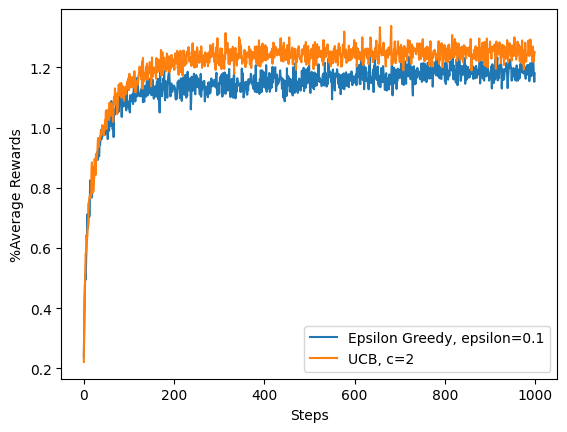

In [9]:
k=10
#Initialize true value for each action
q_star_a = np.random.normal(0,1,k)

n_steps=1000
alpha=0.1
constant_step_size=True
eps=0.1


initial=0.0
c=0.0
rewards,optimal_action_perc = run_bandit(n_steps=n_steps,eps=eps,constant_step_size=constant_step_size,alpha=alpha,initial=initial,c=c)
plt.plot(rewards,label=f'Epsilon Greedy, epsilon={eps}');
plt.legend()

#Assign optimistic values of 5 to initial estimates

eps=0.0
initial=0.0
c=2
rewards,optimal_action_perc = run_bandit(n_steps=n_steps,eps=eps,constant_step_size=constant_step_size,alpha=alpha,initial=initial,c=c)
plt.plot(rewards,label=f'UCB, c=2');
plt.xlabel('Steps')
plt.ylabel('%Average Rewards')
plt.legend()

In [4]:
q_star_a

array([ 1.33546741, -0.39100966, -0.29920367, -0.34096575, -0.61489367,
        0.93419343,  0.64383971,  0.94863976, -0.42500258, -0.986735  ])

## Conlcusion

In this video we covered the Upper confidency bound method to improve the action selection method and improve the agent's learning progress over time

In the upcoming videos we will continue our journey in the Multi-Armed Bandits and learn about
- Gradient Bandit Algorithms
- Contextual bandits
- Finally a comparison of all the Bandit algorithms and decide which one is best
  